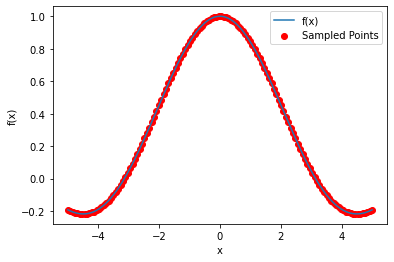

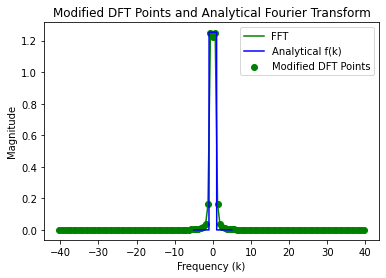

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

# Define the function f(x)
def f(x):
    if x != 0:
        return np.sin(x)/x
    else:
        return 1

# Number of points to sample
n = 128
xmin = -5
xmax = 5

# Calculate the delta for regular intervals
delta = (xmax - xmin) / n

# Generate x values at regular intervals
x_values = np.linspace(xmin, xmax, n)

# Calculate y values using the function f(x)
y_values = np.array([f(x) for x in x_values])

# Plot the function f(x)
x = np.linspace(xmin, xmax, 1000)
y = np.array([f(xi) for xi in x])
plt.plot(x, y, label='f(x)')

# Plot the sampled points
plt.scatter(x_values, y_values, color='red', label='Sampled Points')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

# Calculate the DFT of the sampled points
dft = np.fft.fft(y_values, norm="ortho")

# Calculate the frequencies corresponding to the DFT values
freqs = np.fft.fftfreq(len(y_values), d=delta)

# Shift the frequencies so that the zero frequency is in the middle
freqs_shifted = np.fft.fftshift(2*np.pi*freqs)
dft_shifted = np.fft.fftshift(dft)

# Define the analytical Fourier transform function f(k)
def f_k(k):
    if -1 < k < 1:
        return np.sqrt(np.pi / 2)
    else:
        return 0

# Multiply the DFT points by the prefactor and exp(i * k_q * x_min)
dft_modified = np.array([delta * np.sqrt(n / (2 * np.pi)) * cmath.exp(-1j * k_q * xmin) * dft_shifted[i] for i, k_q in enumerate(freqs_shifted)])

plt.figure()

# Plot the modified DFT points
plt.scatter(freqs_shifted, np.abs(dft_modified), color='green', label='Modified DFT Points')
plt.plot(freqs_shifted, np.abs(dft_modified), color='green', label='FFT')

# Calculate f(k) for plotting
k_values = np.linspace(-5, 5, 1000)
f_k_values = np.array([f_k(k) for k in k_values])

# Plot the analytical Fourier transform f(k)
plt.plot(k_values, f_k_values, color='blue', label='Analytical f(k)')

plt.xlabel('Frequency (k)')
plt.ylabel('Magnitude')
plt.title('Modified DFT Points and Analytical Fourier Transform')
plt.legend()
plt.show()
